In [ ]:
!pip install basedosdados

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import basedosdados as bd
import re
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_graphviz, export_text
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
query = """
    SELECT
    dados.id as id,
    dados.title as title,
    dados.link as link,
    dados.year as year,
    dados.duration as duration,
    dados.rating_mpa as rating_mpa,
    dados.rating_imdb as rating_imdb,
    dados.vote as vote,
    dados.budget as budget,
    dados.gross_world_wide as gross_world_wide,
    dados.gross_us_canada as gross_us_canada,
    dados.gross_opening_weekend as gross_opening_weekend,
    dados.director as director,
    dados.writer as writer,
    dados.star as star,
    dados.genre as genre,
    dados.country_origin as country_origin,
    dados.filming_location as filming_location,
    dados.production_company as production_company,
    dados.language as language,
    dados.win as win,
    dados.nomination as nomination,
    dados.oscar as oscar
FROM `basedosdados.world_imdb_movies.top_movies_per_year` AS dados
"""

df = bd.read_sql(query, billing_project_id="e-health-416317")
df.head(10)

Downloading: 100%|██████████|


,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,writer,star,genre,country_origin,filming_location,production_company,language,win,nomination,oscar
0,tt0073470,Strip Nude for Your Killer,https://www.imdb.com/title/tt0073470,1975,1h 38m,Not Rated,5.6,33000,NaN,NaN,...,"Andrea Bianchi, Massimo Felisatti","Edwige Fenech, Nino Castelnuovo, Femi Benussi","Erotic Thriller, Giallo, Slasher Horror, Horro...",Italy,"Milan, Lombardia, Italy",FRAL Cinematografica,Italian,0,0,0
1,tt0072764,Carry on Behind,https://www.imdb.com/title/tt0072764,1975,1h 30m,Not Rated,5.6,31000,NaN,NaN,...,Dave Freeman,"Elke Sommer, Kenneth Williams, Bernard Bresslaw","Parody, Slapstick, Comedy",United Kingdom,"Bad Godesberg Way, Maidenhead, Berkshire, Engl...","The Rank Organisation, Peter Rogers Productions",English,0,0,0
2,tt0131526,"So Young, So Lovely, So Vicious...",https://www.imdb.com/title/tt0131526,1975,1h 30m,None,4.9,487,NaN,NaN,...,"Silvio Amadio, Roberto Natale","Gloria Guida, Dagmar Lassander, Fred Robsahm","Drama, Mystery, Thriller",Italy,"Sardinia, Italy",Domiziana Internazionale Cinematografica,Italian,0,0,0
3,tt0073335,Mahogany,https://www.imdb.com/title/tt0073335,1975,1h 49m,PG,6.1,23000,NaN,NaN,...,"John Byrum, Toni Amber","Diana Ross, Billy Dee Williams, Anthony Perkins","Drama, Romance",United States,Marshall Field Co Department Store 111 N Sta...,"Motown Productions, Nikor Productions, Paramou...","English, Italian",0,0,1
4,tt0073006,Foreplay,https://www.imdb.com/title/tt0073006,1975,1h 15m,R,4.0,185,NaN,NaN,...,"Dan Greenburg, Jack Richardson, Bruce Jay Frie...","Irwin Corey, Pat Paulsen, Deborah Loomis","Parody, Satire, Sketch Comedy, Comedy",United States,None,SynFrank Enterprises,English,0,0,0
5,tt0073343,The Man from Hong Kong,https://www.imdb.com/title/tt0073343,1975,1h 46m,R,6.6,2000,535000.0,684.0,...,Brian TrenchardSmith,"Jimmy Wang Yu, George Lazenby, Hugh KeaysByrne","Action, Adventure, Crime, Drama","Australia, Hong Kong","Stanwell Park, New South Wales, Australia","Golden Harvest Company, The Movie Company Pty ...","English, Mandarin",0,0,0
6,tt0073461,Night of the Seagulls,https://www.imdb.com/title/tt0073461,1975,1h 29m,R,5.7,23000,NaN,NaN,...,"HP Lovecraft, Amando de Ossorio","Vctor Petit, Mara Kosty, Sandra Mozarowsky",Horror,Spain,"Tossa de Mar, Girona, Catalonia, Spain","Ancla Century Films, Profilmes, Prez Pareja, M...",Spanish,0,0,0
7,tt0073482,The Olsen Gang on the Track,https://www.imdb.com/title/tt0073482,1975,1h 45m,Not Rated,7.2,22000,NaN,NaN,...,"Erik Balling, Henning Bahs","Ove Sproge, Morten Grunwald, Poul Bundgaard","Comedy, Crime, Family",Denmark,"Asta Nielsen Strdet, Valby, Copenhagen, Denmark",Nordisk Film,Danish,0,0,0
8,tt0073208,A Woman Called Sada Abe,https://www.imdb.com/title/tt0073208,1975,1h 25m,None,6.1,626,NaN,NaN,...,Akio Ido,"Junko Miyashita, Eimei Esumi, Gensh Hanayagi","Biography, Drama",Japan,None,Nikkatsu,Japanese,0,0,0
9,tt0360231,Zinda Dil,https://www.imdb.com/title/tt0360231,1975,2h 5m,None,6.9,69,NaN,NaN,...,KD Shorey,"Rishi Kapoor, Neetu Singh, Zaheera","Action, Romance",India,None,NH Studioz,Hindi,0,0,0


In [3]:
def extract_duration_minutes(duration_str):
    if pd.isna(duration_str):
        return 0.0

    hours = 0
    minutes = 0

    hour_match = re.search(r'(\d+)h', str(duration_str))
    if hour_match:
        hours = int(hour_match.group(1))

    minute_match = re.search(r'(\d+)m', str(duration_str))
    if minute_match:
        minutes = int(minute_match.group(1))

    return hours * 60 + minutes

df['duration_minutes'] = df['duration'].apply(extract_duration_minutes)

print("Exemplos de conversão de duração:")
df[['duration', 'duration_minutes']].head()

Exemplos de conversão de duração:


,duration,duration_minutes
0,1h 38m,98.0
1,1h 30m,90.0
2,1h 30m,90.0
3,1h 49m,109.0
4,1h 15m,75.0


In [4]:
df.dropna(subset=['budget', 'gross_world_wide'], inplace=True)

Distribuição de filmes por categoria de avaliação:
rating_category
médio    5324
baixo    3131
alto      951
Name: count, dtype: int64


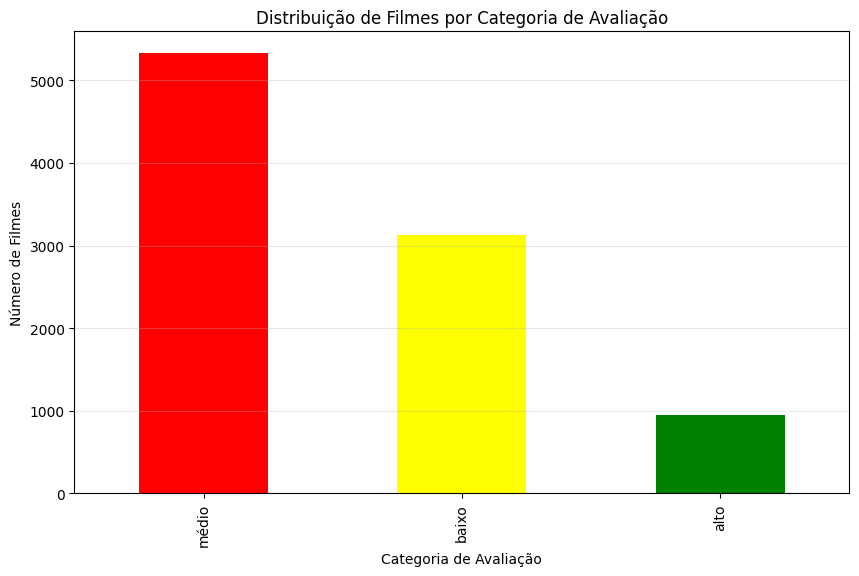

In [5]:
df['rating_category'] = pd.cut(df['rating_imdb'],
                              bins=[0, 6.0, 7.5, 10.0],
                              labels=['baixo', 'médio', 'alto'])

rating_counts = df['rating_category'].value_counts()
print("Distribuição de filmes por categoria de avaliação:")
print(rating_counts)

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Distribuição de Filmes por Categoria de Avaliação')
plt.xlabel('Categoria de Avaliação')
plt.ylabel('Número de Filmes')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [6]:
# Definir X e y
X = df[['budget', 'gross_world_wide', 'duration_minutes']]  # Exemplo de atributos
y = df['rating_category']  # Alvo (categorias de avaliação)

In [7]:
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')

Tamanho de X:  (9406, 3) 

Tamanho de y:  (9406,) 



In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [9]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (7054, 3) 

Tamanho de X_test:  (2352, 3) 

Tamanho de y_train:  (7054,) 

Tamanho de y_test:  (2352,) 



In [10]:

treeIMDb = DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=123)
treeIMDb.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=123)

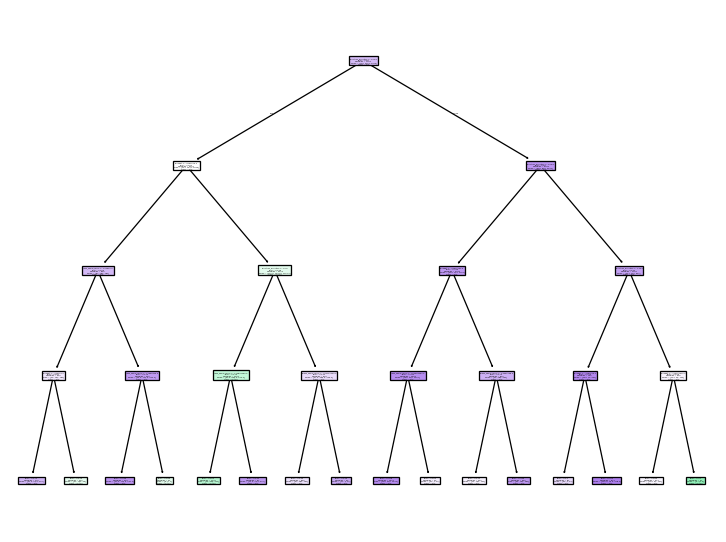

In [11]:
# Visualizar a árvore
fig, ax = plt.subplots(figsize=(8, 6), dpi=92)
plot_tree(treeIMDb, ax=ax, feature_names=X.columns, class_names=y.cat.categories, filled=True)
plt.tight_layout()
plt.show()

In [12]:
print(export_text(treeIMDb, feature_names=list(X.columns), spacing=5))

|----- duration_minutes <= 102.50
|     |----- budget <= 2250000.00
|     |     |----- gross_world_wide <= 121667.00
|     |     |     |----- budget <= 390000.00
|     |     |     |     |----- class: médio
|     |     |     |----- budget >  390000.00
|     |     |     |     |----- class: baixo
|     |     |----- gross_world_wide >  121667.00
|     |     |     |----- gross_world_wide <= 21869405.00
|     |     |     |     |----- class: médio
|     |     |     |----- gross_world_wide >  21869405.00
|     |     |     |     |----- class: baixo
|     |----- budget >  2250000.00
|     |     |----- duration_minutes <= 96.50
|     |     |     |----- gross_world_wide <= 210879160.00
|     |     |     |     |----- class: baixo
|     |     |     |----- gross_world_wide >  210879160.00
|     |     |     |     |----- class: médio
|     |     |----- duration_minutes >  96.50
|     |     |     |----- gross_world_wide <= 314780400.00
|     |     |     |     |----- class: médio
|     |     |     |-----

In [15]:

y_train_true = y_train
y_train_pred = treeIMDb.predict(X_train)
y_test_true = y_test
y_test_pred = treeIMDb.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.61

 ---------------------------

Acurácia de Teste: 0.59


In [16]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[   0   22  209]
 [   0  288  482]
 [   0  243 1108]]
